**Exploratory Data Analysis:**

This file is composed of components of the EDA process for preliminary exploration of your data. This code is not a complete EDA, but rather a preliminary examination of data. Please see the Table of Contents to explore different areas of EDA.

DataSet link: https://drive.google.com/file/d/1GtwjrZpP6jiZWXyYShiMHBamUstFgaEF/view

he Adult dataset is a widely used standard machine learning dataset, used to explore and demonstrate many machine learning algorithms, both generally and those designed specifically for imbalanced classification.

In [2]:
#importing requirements
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from scipy import stats
filterwarnings("ignore")
%matplotlib inline     
sns.set(color_codes=True)

**Step - 1 - Introduction -&gt; Give a detailed data description and objective**

Explanation: https://drive.google.com/file/d/1rfTR8bgYPSV8LlpPpsMNBTa4FM2LafZ6/view

**Step - 2 - Import the data and display the head, shape and description of the data.**

In [3]:
# read an excel file and convert into a dataframe object
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Step - 3 - Univariate Analysis -> PDF, Histograms, Boxplots, Countplots, etc..**

1. Understand the probability and frequency distribution of each numerical column

2. Understand the frequency distribution of each categorical Variable/Column

3. Mention observations after each plot 


In [6]:
df.isnull().sum()   # Used to count the null values in rows

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

It shows presence of null value and all the columns are filled

##Statistical Analysis

In [7]:
np.round(df.describe())

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.0,48842.0,48842.0,48842.0,48842.0,48842.0
mean,39.0,189664.0,10.0,1079.0,88.0,40.0
std,14.0,105604.0,3.0,7452.0,403.0,12.0
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117550.0,9.0,0.0,0.0,40.0
50%,37.0,178144.0,10.0,0.0,0.0,40.0
75%,48.0,237642.0,12.0,0.0,0.0,45.0
max,90.0,1490400.0,16.0,99999.0,4356.0,99.0


In [8]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [9]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [10]:
df['income'] = df['income'].replace({'<=50K': 'low', '>50K': 'high'})

In [11]:
df['income'].value_counts()

low     37155
high    11687
Name: income, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ed55cf450>,
      dtype=object)

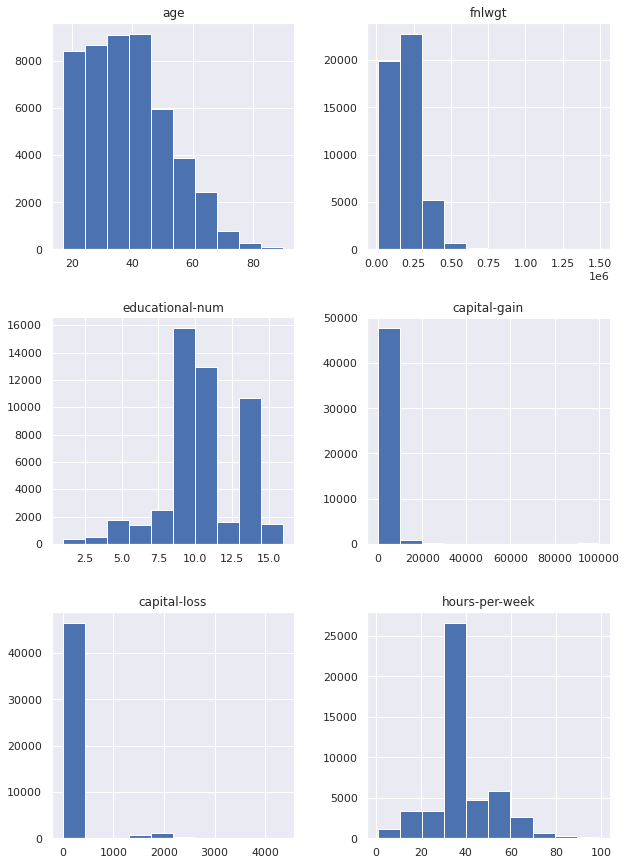

In [12]:
df.hist(figsize = (10, 15))

In [13]:
#finding number of columns has -1 as outliers
col=df.columns
output=[len(df[df[x]=='?'])for x in col]
print(output)

[0, 2799, 0, 0, 0, 0, 2809, 0, 0, 0, 0, 0, 0, 857, 0]


In [14]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [15]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [16]:
df['native-country'].mode()

0    United-States
dtype: object

**We will replace columns which have null values and outliers**

In [17]:
df['workclass']=df['workclass'].replace('?', 'Private') #most occuring value
df['occupation']=df['occupation'].replace('?', 'Prof-specialty') #most occuring value
df['native-country']=df['native-country'].replace('?', 'United-States')

**Segregating numerical and categorical columns**

In [18]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

numeric_data.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [19]:
categorical_data.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

**Replacing NAN Values**

In [20]:
df['relationship']=df['relationship'].replace(np.NAN, df['relationship'].mode) #replacing by most occuring value
df['race']=df['race'].replace(np.NAN, df['race'].mode) #replacing by most occuring value
df['gender']=df['gender'].replace(np.NAN, df['gender'].mode) #replacing by most occuring value
df['capital-gain']=df['capital-gain'].replace(np.NAN, df['capital-gain'].mean) #replacing by mean
df['capital-loss']=df['capital-loss'].replace(np.NAN, df['capital-loss'].mean) #replacing by mean
df['hours-per-week']=df['hours-per-week'].replace(np.NAN, df['hours-per-week'].mean) #replacing by mean
df['native-country']=df['native-country'].replace(np.NAN, df['native-country'].mode) #replacing by most occuring value
df['income']=df['income'].replace(np.NAN, df['income'].mode) #replacing by most occuring value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


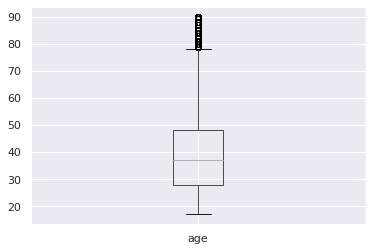

In [21]:
df.boxplot(column=['age'])

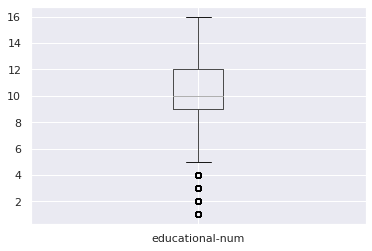

In [22]:
df.boxplot(column=['educational-num'])

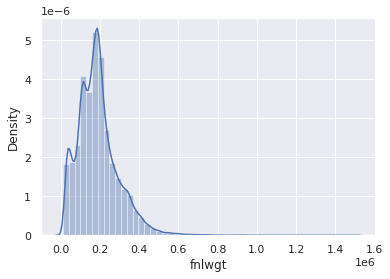

In [23]:
sns.distplot(df['fnlwgt'])


In [24]:
df['income'].value_counts()#it seems that less than 50k most of the salary is

low     37155
high    11687
Name: income, dtype: int64

In [25]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,NaN
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,NaN
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,NaN
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,NaN
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,NaN


<function matplotlib.pyplot.show(*args, **kw)>

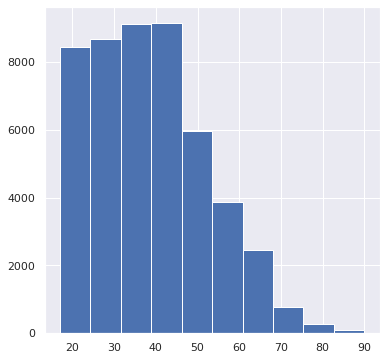

In [26]:
df['age'].hist(figsize = (6,6))
plt.show

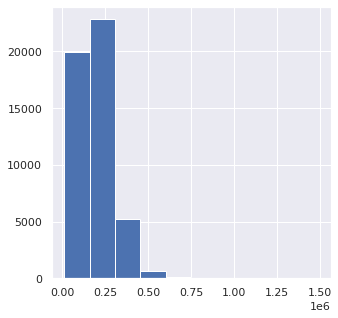

In [27]:
df['fnlwgt'].hist(figsize = (5,5))
plt.show()

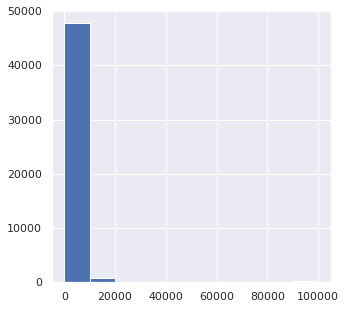

In [28]:
df['capital-gain'].hist(figsize=(5,5))
plt.show()

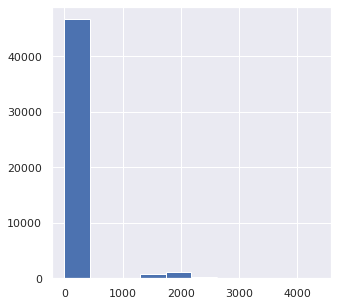

In [29]:
df['capital-loss'].hist(figsize=(5,5))
plt.show()

##Frequency Distribution of each Categorical Variable by using Count Plot.

In [36]:
print(categorical_data.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [37]:
def catg(catg_var):
    plt.figure(figsize=(15,5))
    plt.xticks(rotation = 90)
    ax=sns.countplot(df[catg_var].dropna(), order=df[catg_var].value_counts().iloc[:15].index)
    for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

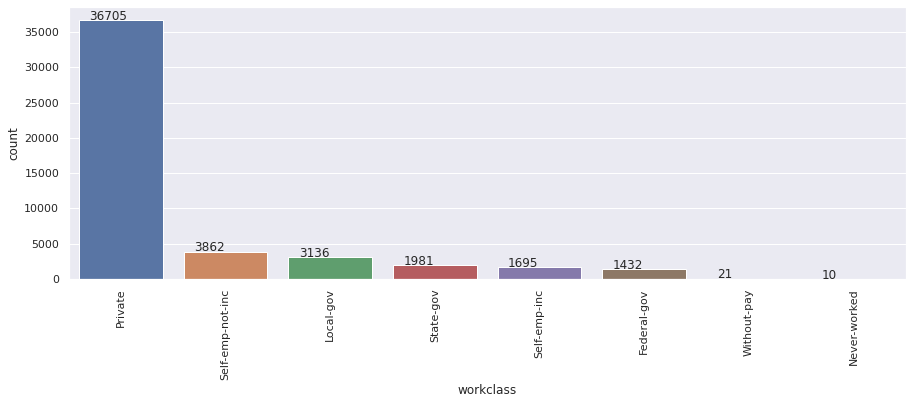

In [38]:
#Count plot of workclass
catg('workclass')

From the above plot we see that private is more in workclass

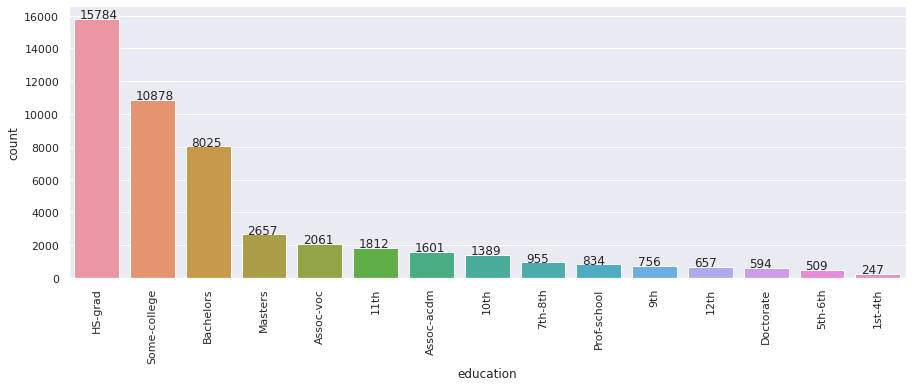

In [39]:
#Count plot of Education
catg('education')

From the above plot we see that most of the education is HS-grad

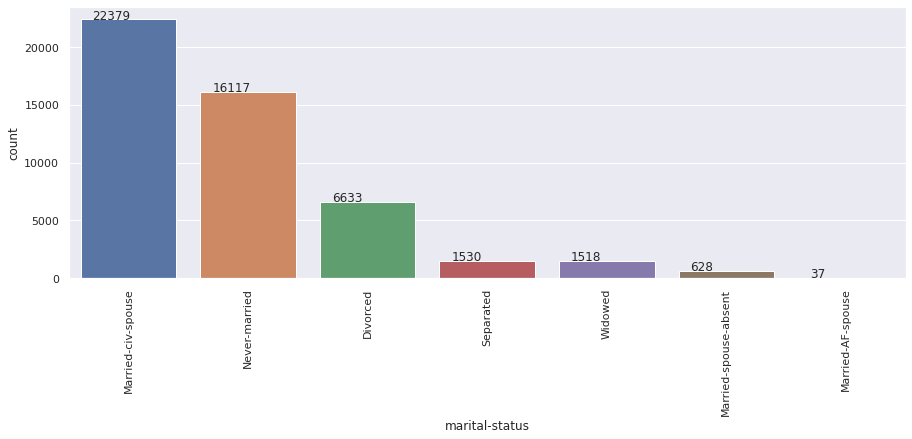

In [40]:
#Count plot of Marital status
catg('marital-status')

From the above plot we see that most of the marital status is Married-civ-spouse

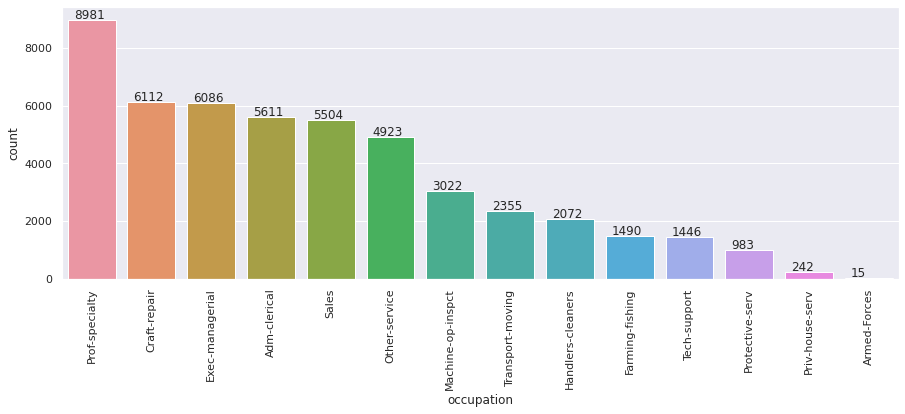

In [41]:
#Count plot of Occupation
catg('occupation')

From the above plot we consider the most frequent occupation is craft repair

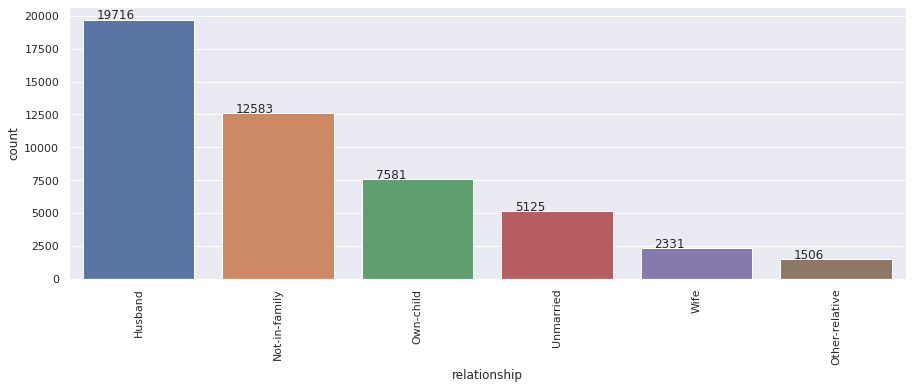

In [42]:
#Count plot of relationship
catg('relationship')

**Step - 4 - Bivariate Analysis**
- Discover the relationships between numerical columns using Scatter plots, hexbin plots,
pair plots, etc..
- Identify the patterns between categorical and numerical columns using swarmplot,
boxplot, barplot, etc..
- Mention observations after each plot.

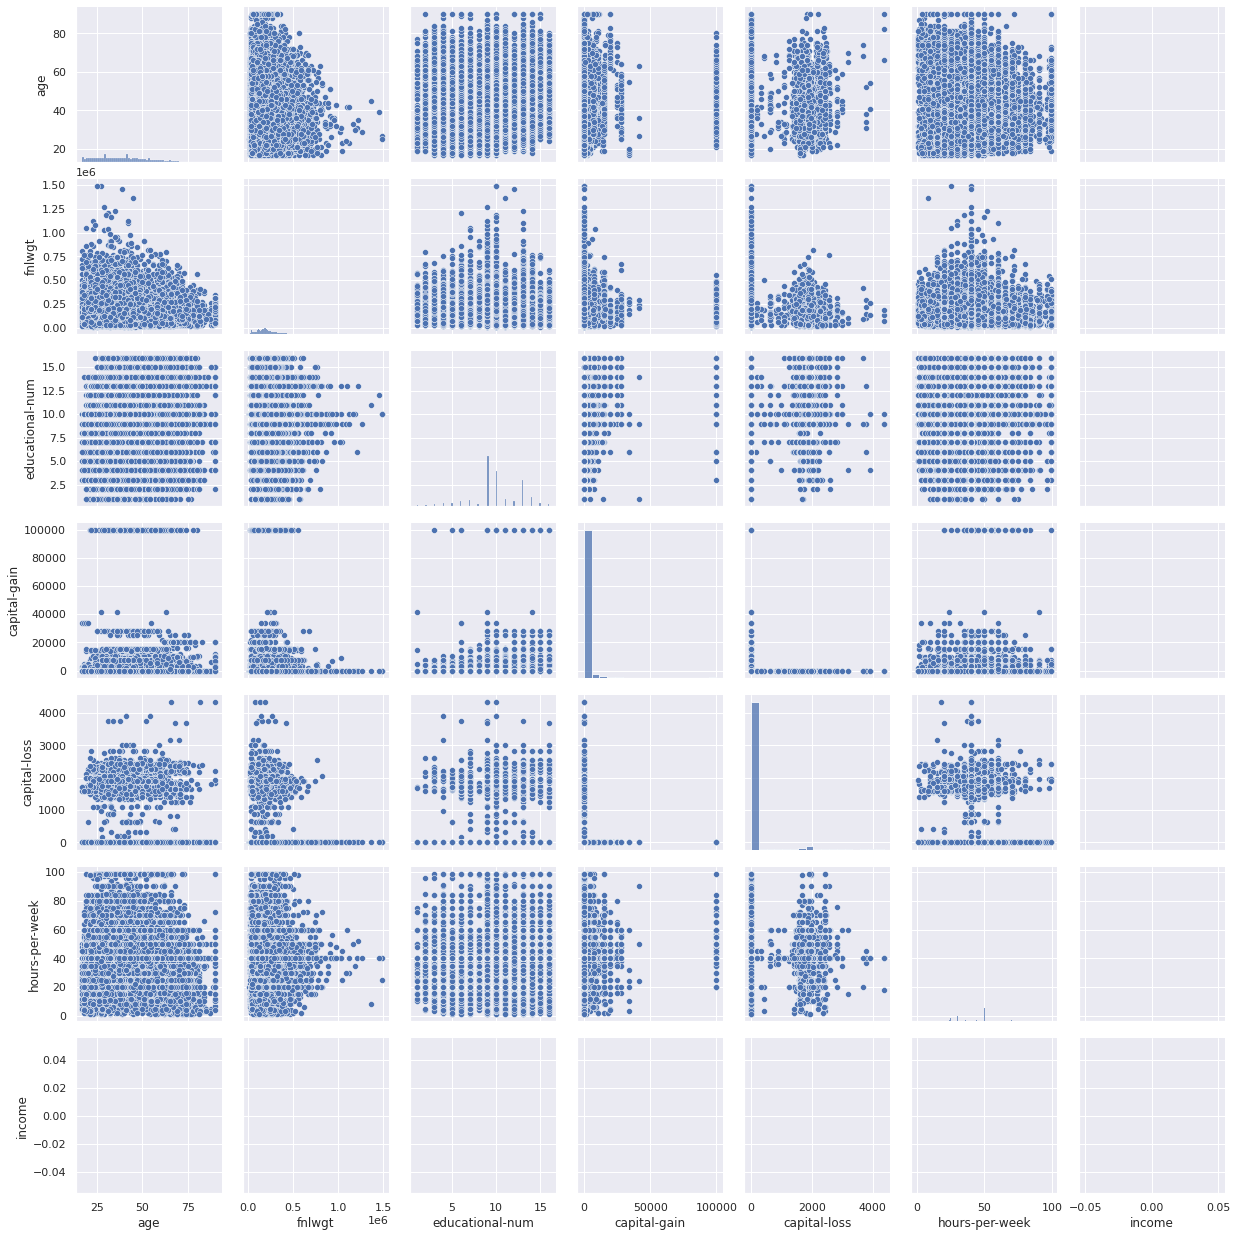

In [30]:
sns.pairplot(df)

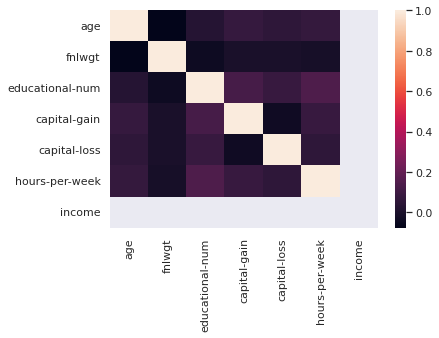

In [31]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

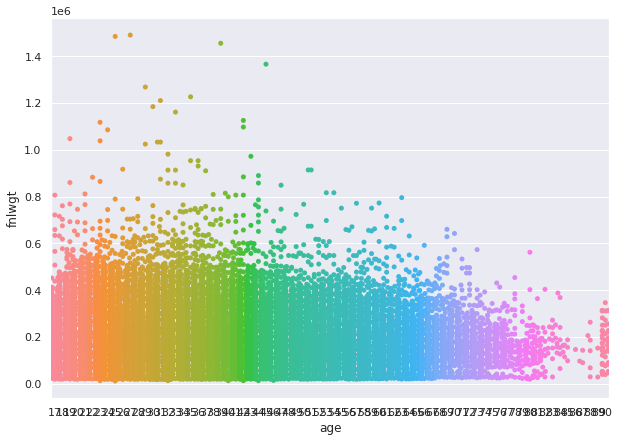

In [55]:
#Swarm Plot
plt.figure(figsize=(10,7))
sns.swarmplot(data = df, x='age', y='fnlwgt')

#Feature Transformation
###Standardization for Numerical Features

In [58]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [59]:
num=df[numeric_data.columns]
df_num = pd.DataFrame(scaler.fit_transform(num),columns = num.columns)
df_num.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918


##One hot Encoding for Categorical Features

In [60]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [61]:
catg = df[categorical_data.columns]
df_catg = pd.DataFrame(encoder.fit_transform(catg), 
                      columns=encoder.get_feature_names(catg.columns))
df_catg.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##Dataset after Feature Transformation

In [62]:
new_df = pd.concat([df_num,df_catg], axis = 1)
new_df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##Split the dataset into train and test

In [63]:
df1 = new_df.iloc[:,:-1] 
target = new_df.iloc[:,-1]

In [64]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(df1, target, test_size = 0.3)

##Training model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [66]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
                                   
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(name + " : {:.2f}%".format(accuracy_score(y_pred,y_test)*100))

                   Logistic Regression : 99.95%
                   K-Nearest Neighbors : 99.92%
                         Decision Tree : 99.89%
Support Vector Machine (Linear Kernel) : 99.96%
   Support Vector Machine (RBF Kernel) : 99.95%
                        Neural Network : 99.97%
                         Random Forest : 99.95%
                     Gradient Boosting : 99.95%
